# ÁRBOLES DE DECISIÓN 

![Imagen de WhatsApp 2024-03-28 a las 07.35.04_acbfc4a6.jpg](<attachment:Imagen de WhatsApp 2024-03-28 a las 07.35.04_acbfc4a6.jpg>)
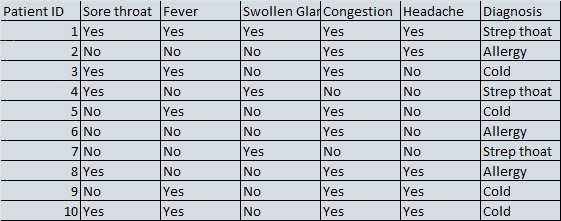


### Transformaciones 
- Yes = 1
- No = 0
- Strep thoat = 0
- Allergy = 1
- Cold = 2

In [1]:
# !pip install -U scikit-learn

### Cargamos Libreria de Arbol

In [2]:
# #? Cargamos las librerias
from sklearn import tree 

### Cargamos los datos desde un archivo .CSV

In [3]:
# Cargamos las librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
datos = pd.read_csv("./IN 05 1 - Diagnostico.csv", sep=';')
datos

,Patient ID,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,1,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,2,No,No,No,Yes,Yes,Allergy
2,3,Yes,Yes,No,Yes,No,Cold
3,4,Yes,No,Yes,No,No,Strep thoat
4,5,No,Yes,No,Yes,No,Cold
5,6,No,No,No,Yes,No,Allergy
6,7,No,No,Yes,No,No,Strep thoat
7,8,Yes,No,No,Yes,Yes,Allergy
8,9,No,Yes,No,Yes,Yes,Cold
9,10,Yes,Yes,No,Yes,Yes,Cold


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient ID      10 non-null     int64 
 1   Sore throat     10 non-null     object
 2   Fever           10 non-null     object
 3   Swollen Glands  10 non-null     object
 4   Congestion      10 non-null     object
 5   Headache        10 non-null     object
 6   Diagnosis       10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


#### Borramos la columna Patient ID

In [6]:
datos = datos.drop(['Patient ID'], axis=1)

In [7]:
datos

,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold
5,No,No,No,Yes,No,Allergy
6,No,No,Yes,No,No,Strep thoat
7,Yes,No,No,Yes,Yes,Allergy
8,No,Yes,No,Yes,Yes,Cold
9,Yes,Yes,No,Yes,Yes,Cold


###  Renombramos las etiquetas de las columnas del dataset

In [8]:
datos = datos.rename(columns={'Sore throat':'Garganta',
                              'Fever':'Fiebre',	
                              'Swollen Glands':'Inflamacion',
                              'Congestion':'Congestion',	
                              'Headache':'Dolor',
                              'Diagnosis':'Diagnostico'})
datos

,Garganta,Fiebre,Inflamacion,Congestion,Dolor,Diagnostico
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold
5,No,No,No,Yes,No,Allergy
6,No,No,Yes,No,No,Strep thoat
7,Yes,No,No,Yes,Yes,Allergy
8,No,Yes,No,Yes,Yes,Cold
9,Yes,Yes,No,Yes,Yes,Cold


### Transformamos los valores nominales a numéricos 

In [9]:
atributos = list(datos.columns)

for atri in atributos:
    if atri != 'Diagnostico':
        datos[atri] = datos[atri].map({'Yes':1, 'No':0})
    else:
        datos[atri] = datos[atri].map({'Strep thoat':0, 'Allergy':1, 'Cold':2})

### Cambiamos las etiquetas de diagnostico
- Strep thoat = 0
- Allergy = 1
- Cold = 2

#### Variables dependientes e independientes

In [10]:
# Variables Independientes
 
vi = ['Garganta', 'Fiebre', 'Inflamacion', 'Congestion', 'Dolor']  ##!mejorar
x = datos[vi].values

# Variable dependiente

y = datos['Diagnostico']

In [11]:
vu = datos.columns
columnas_sin_diagnostico = [col for col in vu if col != 'Diagnostico']

columnas_sin_diagnostico

['Garganta', 'Fiebre', 'Inflamacion', 'Congestion', 'Dolor']

In [12]:
# import warnings
# warnings.filterwarnings('ignore')

### Generar el modelo de clasificacion

In [13]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[0,1,0,0,0]])

if predicciones == 0:
    print('Faringitis')
elif predicciones == 1:
    print('Alergia')
else:
    print('Resfriado')
 

Resfriado


### Graficar el Arbol de clasificacion

se utiliza la libreria Grapviz
* pip install pydotplus

<function matplotlib.pyplot.show(close=None, block=None)>

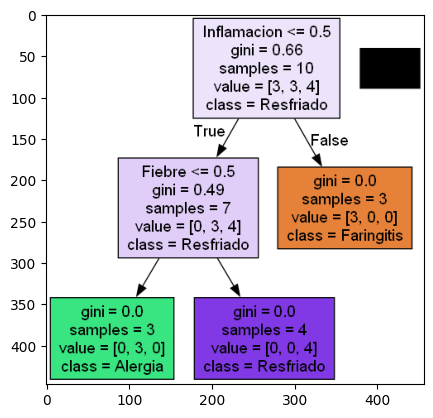

In [14]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

clase = ['Faringitis', 'Alergia', 'Resfriado'] 

datos = tree.export_graphviz(clasificador, 
                            feature_names=columnas_sin_diagnostico,
                            class_names= clase,
                            filled=True,
                            )
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('miarbol.png')
imagen = pltimg.imread('miarbol.png')
plt.imshow(imagen)
plt.show